In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random
import json
import pandas
from PIL import ImageDraw, Image, ImageFont

In [2]:
font_url = "../res/fonts/TIMES.csv"

### main functions

In [3]:
def gray_to_bw(gray, thresh):
    '''
    Returns a new image
    '''
    bw = gray.copy()
    bw[bw<thresh]=0
    bw[bw>=thresh]=255
    return bw    


### code

In [4]:
my_data = np.genfromtxt(font_url, delimiter=',')
my_data = my_data[1:,12:]

In [5]:
my_data

array([[  1.,   1.,   1., ..., 255.,  86.,   1.],
       [  1.,  47., 255., ...,   1.,   1.,   1.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  1.,   1.,  14., ...,   1.,   1.,   1.],
       [  1.,   1.,   1., ...,   1.,   1.,   1.]])

In [6]:
n = np.sqrt(my_data[0].shape)

In [7]:
data = pandas.read_csv(font_url)

In [8]:
data.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
0,TIMES,scanned,50,0.4,0,0.0,0,0,14,12,...,255,255,255,255,255,255,255,255,86,1
1,TIMES,scanned,55,0.4,0,0.0,0,0,14,11,...,232,1,1,1,1,1,1,1,1,1
2,TIMES,scanned,82,0.4,0,0.0,0,0,15,15,...,1,1,1,1,86,255,255,255,255,255
3,TIMES,scanned,55,0.4,0,0.0,0,0,14,6,...,1,1,1,3,5,5,4,4,4,4
4,TIMES,scanned,50,0.4,0,0.0,0,0,19,12,...,204,204,203,210,214,214,211,204,170,153


In [42]:
is_times = data['fontVariant']=='TIMES NEW ROMAN'
data_copy=data.copy()
data = data[is_times]

In [77]:
data = data[data['m_label'] >= ord('A')]
data = data[data['m_label'] <= ord('Z')]

In [104]:
data.head()

,font,fontVariant,m_label,strength,italic,orientation,m_top,m_left,originalH,originalW,...,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19
4747,TIMES,TIMES NEW ROMAN,90,0.4,0,0.0,35,20,45,38,...,227,227,227,227,227,233,255,255,242,1
4748,TIMES,TIMES NEW ROMAN,89,0.4,0,0.0,35,22,45,46,...,255,248,134,104,1,1,1,1,1,1
4749,TIMES,TIMES NEW ROMAN,88,0.4,0,0.0,35,21,45,47,...,1,10,114,216,255,255,255,252,196,114
4750,TIMES,TIMES NEW ROMAN,87,0.4,0,0.0,35,21,46,61,...,1,1,1,154,26,1,1,1,1,1
4751,TIMES,TIMES NEW ROMAN,86,0.4,0,0.0,35,21,46,46,...,159,93,1,1,1,1,1,1,1,1


In [98]:
data.reindex()
data.shape

(104, 412)

Letter: 'A'
Width: 20, Height: 20


numpy.ndarray

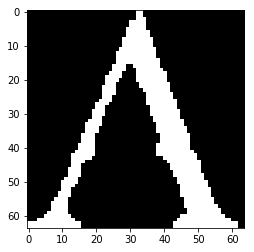

In [170]:
# data = data_copy.copy()
i = np.random.randint(0,data.shape[0])
# i
char_data = data.iloc[i]
char_label = int(char_data['m_label'])
w = char_data['w']
h = char_data['h']
print("Letter: '{}'".format(chr(char_label)))
print("Width: {}, Height: {}".format(w,h))
image = char_data['r0c0':].values
image = image.reshape((w,h))
image = image.astype(float)
image = cv2.resize(image, (64,64))
image = gray_to_bw(image.astype(int), 128)

plt.figure()
plt.imshow(image.astype(int), cmap='gray')

type(img2[0])

In [150]:
img2.dtype

dtype('int64')

## -----------------------------------------------------------------------

## PIL

final font size 106


array([  0, 255], dtype=uint8)

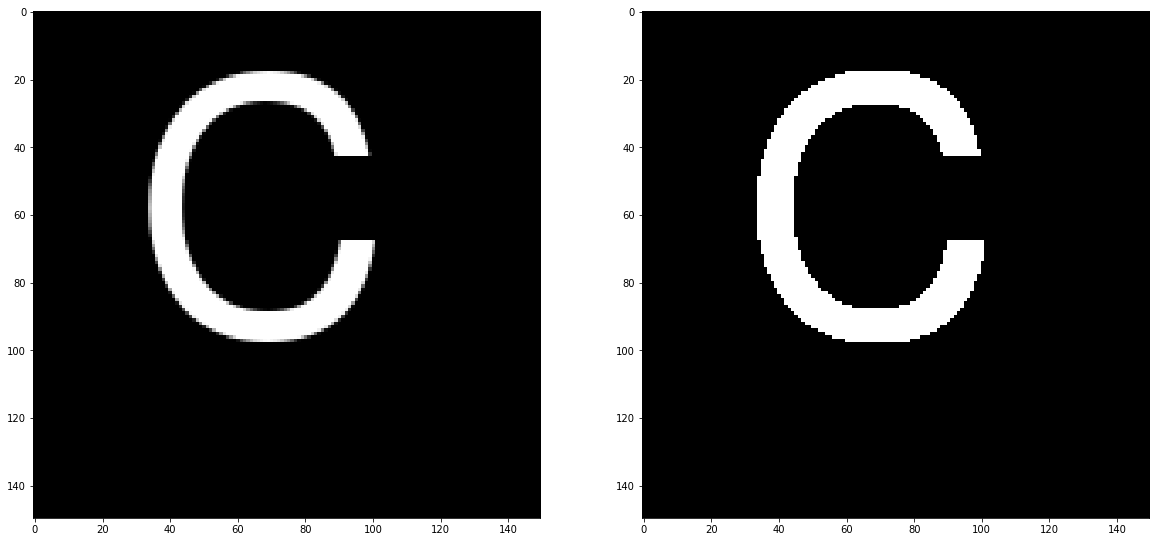

In [11]:
a = np.zeros([150,150],dtype=np.uint16)
img = Image.fromarray(a,mode='L')

draw = ImageDraw.Draw(img)

fontsize = 100
img_fraction = 0.5

ttf_url = "../fonts-ttf/FreeSans.ttf"

font = ImageFont.truetype(ttf_url, fontsize)
txt = chr(np.random.randint(ord('A'), ord('Z')+1))
# txt = 'N'
while font.getsize(txt)[0] < img_fraction*img.size[1]:
    # iterate until the text size is just larger than the criteria
    fontsize += 1
    font = ImageFont.truetype(ttf_url, fontsize)
    
# fontsize = 100
# font = ImageFont.truetype(ttf_url, fontsize)
print('final font size',fontsize)



draw.text((30,0), txt, font=font, fill=255)

#plt.figure()
# plt.imshow(img, cmap='gray')

thresh = 1
img_data = gray_to_bw(np.array(img), thresh)



plt.figure(figsize=(20,20))
plt.subplot(121), plt.imshow(np.array(img), cmap='gray')

# plt.figure(figsize=(20,20))
plt.subplot(122), plt.imshow(img_data, cmap='gray')


np.unique(img_data)